In [1]:
import pandas as pd
import datetime

In [195]:
# Reading in data

crimes = pd.read_csv('Crimes.csv')
full_moon = pd.read_csv('full_moon.csv')
holidays = pd.read_csv('holidays.csv')
weather = pd.read_csv('weather.csv')
unemploy = pd.read_csv('CHIC917URN.csv')

### Merge Datasets
Here each date column is turned into a simple date time of the form Year/Month/Day to more easily join them together.

In [196]:
# Aligning date columns to allow for joining

weather['date'] = pd.to_datetime(weather['datetime'])
weather.drop(columns=['datetime'], inplace = True)

crimes['Date'] = pd.to_datetime(crimes.Date)
crimes['date'] = pd.to_datetime(pd.to_datetime(crimes['Date']).dt.date)
crimes['time'] = pd.to_datetime(crimes['Date']).dt.time
crimes['day_of_week'] = pd.to_datetime(crimes['date']).dt.day_of_week
crimes.drop(columns=['Date'], inplace=True)

full_moon['date'] = pd.to_datetime(full_moon.FullMoonDates)
full_moon.drop(columns=['FullMoonDates', 'Year'], inplace=True)
full_moon['full_moon'] = (pd.DataFrame({'full_moon': pd.Series(['full moon'] * len(full_moon))}))

holidays['date'] = pd.to_datetime(holidays.Date)
holidays.drop(columns = ['Date'], inplace=True)

unemploy['date'] = pd.to_datetime(unemploy['DATE'])
unemploy.drop(columns=['DATE'], inplace = True)

In [4]:
# Merging dataframes

merged = pd.merge(crimes, weather, on='date', how='left')
merged = pd.merge(merged, full_moon, on='date', how = 'left')
merged = pd.merge(merged, holidays, on='date', how = 'left')
merged = pd.merge(merged, unemploy, on='date', how = 'left')

### Possible Factors

Below is a list of all of the possible factors from the datasets.

One thing we will want to consider - the prompt asks for us to limit our analysis to instances of violent crime, which some of the rows aren't. We could use the IUCR Illinois crime codes, the FBI codes or the descriptions to find a way to limit the rows.

In [5]:
df = merged[['date',
 'time',
 'day_of_week',
 # 'ID', 'Case Number',
 # 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 # 'Arrest',
 # 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 # 'X Coordinate',
 # 'Y Coordinate',
 # 'Year',
 # 'Updated On',
 # 'Latitude',
 # 'Longitude',
 'Location',
 # 'name',
 'tempmax',
 'tempmin',
 'temp',
 'feelslikemax',
 'feelslikemin',
 'feelslike',
 'dew',
 'humidity',
 'precip',
 'precipprob',
 'precipcover',
 'preciptype',
 'snow',
 'snowdepth',
 'windgust',
 'windspeed',
 # 'winddir',
 # 'sealevelpressure',
 'cloudcover',
 'visibility',
 # 'solarradiation',
 # 'solarenergy',
 # 'uvindex',
 # 'severerisk',
 'sunrise',
 'sunset',
 'moonphase',
 'conditions',
 # 'description',
 # 'icon',
 # 'stations',
 'full_moon',
 'Holiday',
 # 'Day of Week'
 ]]

### Merge on Crimes per Day

In [6]:
crime_count = pd.DataFrame(crimes['date'].value_counts().reset_index())

In [7]:
merged2 = pd.merge(crime_count, weather, on='date', how='left')
merged2 = pd.merge(merged2, full_moon, on='date', how = 'left')
merged2 = pd.merge(merged2, holidays, on='date', how = 'left')
merged2 = pd.merge(merged2, unemploy, on='date', how = 'left')

merged2 = merged2[merged2['date'].dt.year > 2009]
merged2 = merged2.sort_values(by = 'date')

merged2['CHIC917URN'] = merged2['CHIC917URN'].fillna(method='ffill')

merged2['day_of_week'] = pd.to_datetime(merged2['date']).dt.day_of_week
merged2['year'] = pd.to_datetime(merged2['date']).dt.year
merged2['month'] = pd.to_datetime(merged2['date']).dt.month

In [8]:
df['Location Description'].value_counts()

Location Description
STREET                                             147309
SIDEWALK                                            95368
RESIDENCE                                           61446
APARTMENT                                           58919
ALLEY                                               17665
                                                    ...  
TRUCK                                                   1
ROOMING HOUSE                                           1
STAIRWELL                                               1
LIQUOR STORE                                            1
VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS         1
Name: count, Length: 157, dtype: int64

In [9]:
df['day_of_week'].value_counts()

day_of_week
4    76257
2    75971
3    75254
1    75106
5    72866
0    69990
6    66743
Name: count, dtype: int64

### Violent Crimes

26 - Tresspassing, registration offense, harassment, order violation\
07 - Motor vehicle theft\
17 - Sexual Offense\
18 - Drug Violations\
11 - Fraud/Identity theft/Deception\
08B - Battery - Simple\
04B - Battery - Aggravated\
08A - Assault - Simple\
24 - Violation of Peace/Interfering with Officer\
14 - Criminal Damage\
06 - Theft\
05 - Burglary\
15 - Weapons Violation\
13 - Deceptive Practice (Buying or receiving stolen property)\
20 - Offense Involving Children (Abandonment or Endangering)\
10 - Forgery and Counterfeit\
09 - Arson\
22 - Liquor law violation\
16 - Prostitution\
19 - Gambling\
12 - Embezzlement\
27 - Sex Offense\
01B - Homicide


#### Violent Crimes
01A - First Degree Murder\
03 - Robbery\
04A - Assault - Aggravated\
02 - Criminal Sexual Assault

## Random Forest on Whole Dataset

In [10]:
X = merged2[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'humidity',
             'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 
             'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 
             'moonphase', 'day_of_week', 'year', 'month', 'preciptype', 'sunrise', 'sunset', 'conditions', 'full_moon', 
             'Holiday', 'CHIC917URN']]

num_features = merged2[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'humidity',
                        'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 
                        'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 
                        'moonphase', 'day_of_week', 'year', 'month', 'CHIC917URN']]

cat_features = merged2[['preciptype', 'conditions', 'full_moon', 'Holiday']]

cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

y = list(merged2['count'])

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.feature_selection import SelectPercentile, f_regression

In [12]:

numeric = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())])

categorical = Pipeline(steps=[('impute2', SimpleImputer(strategy='most_frequent')),
                     ('one_hot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
                     ('percent', SelectPercentile(f_regression, percentile=60))
                     ])

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric, num_features),
        ("categorical", categorical, cat_features)
        ]
)
rfPipe = Pipeline([('preprocessor', preprocessor),
           ('model', RandomForestRegressor())])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rfPipe = rfPipe.fit(X_train, y_train)

y_pred = rfPipe.predict(X_test)  
mae = mean_absolute_error(y_test, y_pred) 
mae

In [ ]:
rf_model = categorical.named_steps['model']

feature_importances = rf_model.feature_importances_

original_cat_feature_names = cat_features.columns

# Create a DataFrame to store feature importances with corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': original_cat_feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importance_df)

In [ ]:
num_features = merged2[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'humidity',
                        'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 
                        'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 
                        'moonphase', 'day_of_week', 'year', 'month', 'CHIC917URN']]

numeric = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=2)),
    ('standardize', StandardScaler()),
    ('model', RandomForestRegressor())])

X_train, X_test, y_train, y_test = train_test_split(num_features, y, test_size=0.25, random_state=42)

numeric = numeric.fit(X_train, y_train)

y_pred = numeric.predict(X_test)  
mean_absolute_error(y_test, y_pred) 

7.30890092879257

In [ ]:
rf_model = numeric.named_steps['model']

feature_importances = rf_model.feature_importances_

original_numeric_feature_names = num_features.columns

feature_importance_df = pd.DataFrame({'Feature': original_numeric_feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

             Feature  Importance
24              year    0.368752
26        CHIC917URN    0.084021
23       day_of_week    0.035284
3       feelslikemax    0.034533
14           winddir    0.032910
1            tempmin    0.032343
22         moonphase    0.031695
5          feelslike    0.030455
4       feelslikemin    0.029992
13         windspeed    0.029750
15  sealevelpressure    0.029467
16        cloudcover    0.029159
0            tempmax    0.027985
12          windgust    0.027858
6           humidity    0.027224
18    solarradiation    0.024667
2               temp    0.024052
19       solarenergy    0.021375
7             precip    0.019040
25             month    0.016028
17        visibility    0.013436
9        precipcover    0.009903
20           uvindex    0.008484
11         snowdepth    0.008238
10              snow    0.002238
8         precipprob    0.000904
21        severerisk    0.000206


In [ ]:
betas = numeric.named_steps['model'].feature_importances_

features = numeric.named_steps['poly'].get_feature_names_out()

original_feature_names = numeric.named_steps['impute'].get_feature_names_out()
poly_feature_names = numeric.named_steps['poly'].get_feature_names_out(input_features=original_feature_names)

dict = {'Feature': poly_feature_names, 'Coefficient': betas}
coefficients = pd.DataFrame(dict)

coefficients.sort_values(by='Coefficient', ascending = False).head(10)

,Feature,Coefficient
400,year^2,0.128177
388,severerisk year,0.125851
25,year,0.100130
360,visibility CHIC917URN,0.029293
54,tempmax CHIC917URN,0.026079
339,sealevelpressure CHIC917URN,0.015214
79,tempmin month,0.012080
336,sealevelpressure day_of_week,0.011184
151,feelslikemin month,0.010790
146,feelslikemin uvindex,0.009601


In [41]:
import matplotlib.pyplot as plt

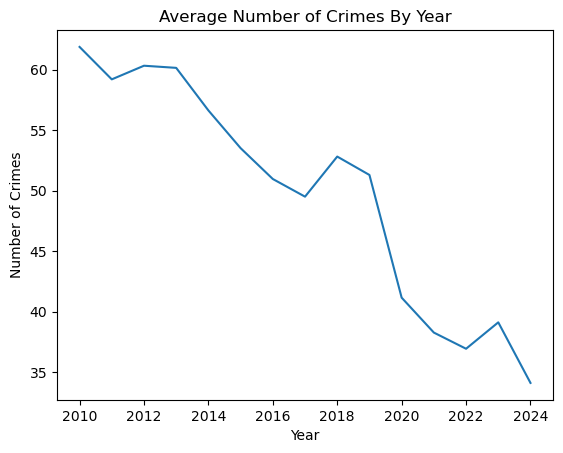

In [ ]:
plt.plot(merged2.groupby(merged2['year'])['count'].mean()) 
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title(f'Average Number of Crimes By Year')

plt.show()

## Random Forest on Violent Crimes

In [14]:

crimes2 = crimes[(crimes['FBI Code'] == '01A') | 
                 (crimes['FBI Code'] == '02') | 
                 (crimes['FBI Code'] == '03') | 
                 (crimes['FBI Code'] == '04A')]
crime_count2 = pd.DataFrame(crimes2['date'].value_counts().reset_index())

In [15]:
merged3 = pd.merge(crime_count2, weather, on='date', how='outer')
merged3 = pd.merge(merged3, full_moon, on='date', how = 'left')
merged3 = pd.merge(merged3, holidays, on='date', how = 'left')
merged3 = pd.merge(merged3, unemploy, on='date', how = 'left')

merged3 = merged3[merged3['date'].dt.year > 2009]
merged3 = merged3.sort_values(by = 'date')

merged3['CHIC917URN'] = merged3['CHIC917URN'].fillna(method='ffill')

merged3['day_of_week'] = pd.to_datetime(merged3['date']).dt.day_of_week
merged3['year'] = pd.to_datetime(merged3['date']).dt.year
merged3['month'] = pd.to_datetime(merged3['date']).dt.month

merged3['count'] = merged3['count'].fillna(0)

In [112]:
num_features = merged3[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'humidity',
                        'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 
                        'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 
                        'moonphase', 'day_of_week', 'month', 'CHIC917URN']]

y = list(merged3['count'])

numeric = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler()),
    ('model', RandomForestRegressor())])

X_train, X_test, y_train, y_test = train_test_split(num_features, y, test_size=0.25, random_state=42)

numeric = numeric.fit(X_train, y_train)

y_pred = numeric.predict(X_test)  
mean_absolute_error(y_test, y_pred) 

1.7286089644513138

In [113]:
rf_model = numeric.named_steps['model']

feature_importances = rf_model.feature_importances_

original_numeric_feature_names = num_features.columns

feature_importance_df = pd.DataFrame({'Feature': original_numeric_feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

             Feature  Importance
15  sealevelpressure    0.071662
14           winddir    0.070331
13         windspeed    0.069484
16        cloudcover    0.066084
22         moonphase    0.065622
6           humidity    0.065516
25        CHIC917URN    0.058136
12          windgust    0.057524
4       feelslikemin    0.042952
1            tempmin    0.041942
18    solarradiation    0.040394
24             month    0.038600
3       feelslikemax    0.037614
0            tempmax    0.035125
19       solarenergy    0.033230
23       day_of_week    0.031677
17        visibility    0.031650
5          feelslike    0.030153
2               temp    0.028160
7             precip    0.028047
20           uvindex    0.018160
9        precipcover    0.014989
11         snowdepth    0.013502
10              snow    0.005489
21        severerisk    0.002033
8         precipprob    0.001925


In [ ]:
cat_features = merged3[['preciptype', 'conditions', 'full_moon', 'Holiday']]

### XGBoost

In [ ]:
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer()),
           ('poly', PolynomialFeatures(degree=1, include_bias=False)),
           ("scaler", StandardScaler())])

categorical_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore")),
           ("selector", SelectPercentile(f_regression, percentile=50))])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features)])

pipe = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("model", XGBRegressor())])
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



xgb_pipe = pipe.fit(X_train, y_train)

## Graphs

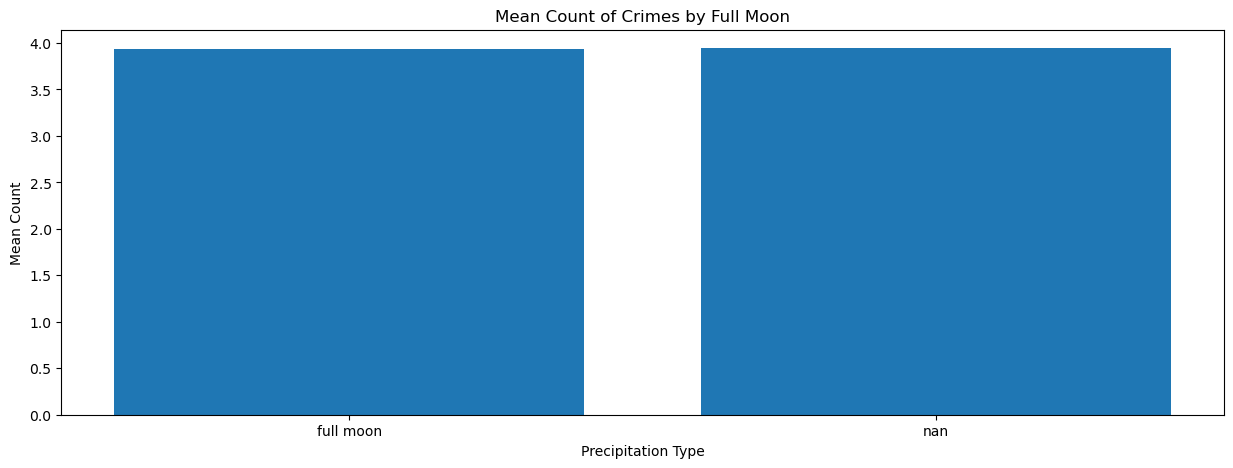

In [ ]:
merged3['full_moon'] = merged3['full_moon'].astype(str)
means = merged3.groupby(merged3['full_moon'])['count'].mean()

# Plot the bar graph
plt.figure(figsize=(15, 5))
plt.bar(means.index, means.values)

# Labeling the axes and title
plt.xlabel('Precipitation Type')
plt.ylabel('Mean Count')
plt.title('Mean Count of Crimes by Full Moon')
plt.show()

In [ ]:
merged3.groupby(merged3['full_moon'])['count'].mean()

full_moon
full moon    3.936416
nan          3.945800
Name: count, dtype: float64

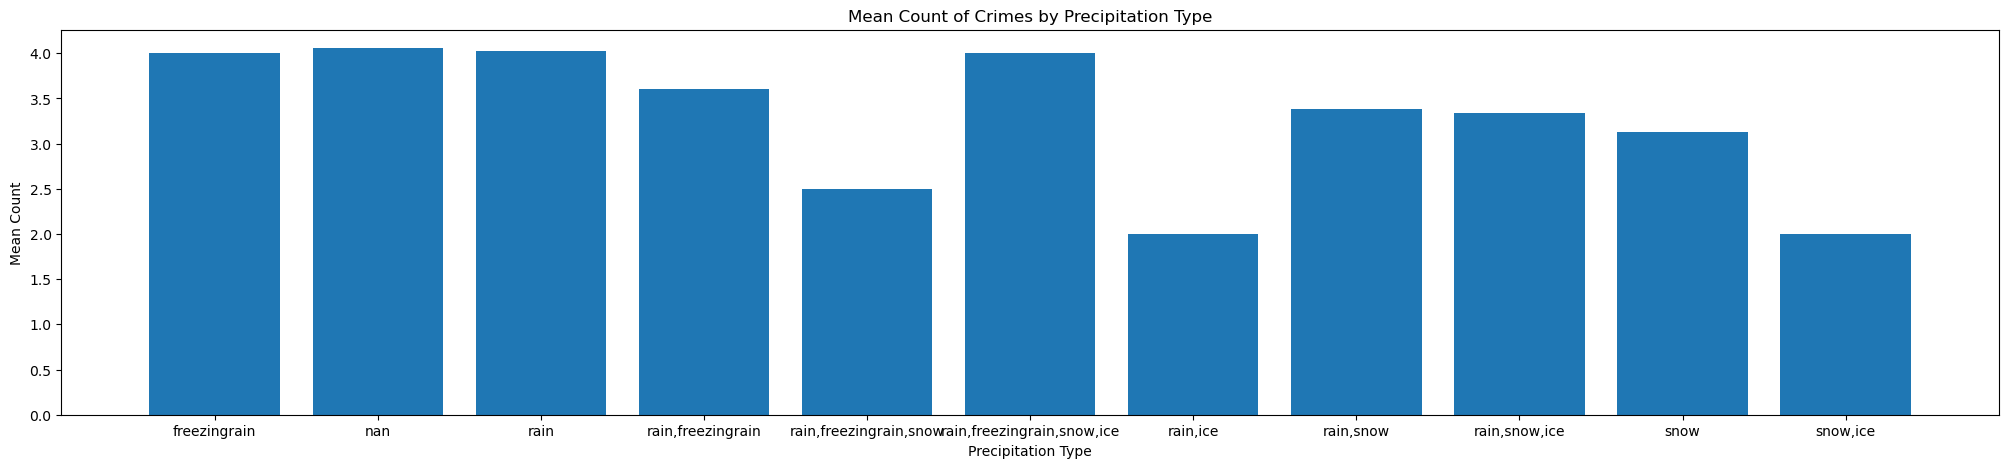

In [92]:
merged3['preciptype'] = merged3['preciptype'].astype(str)
means = merged3.groupby(merged3['preciptype'])['count'].mean()

# Plot the bar graph
plt.figure(figsize=(25, 5))
plt.bar(means.index, means.values)

# Labeling the axes and title
plt.xlabel('Precipitation Type')
plt.ylabel('Mean Count')
plt.title('Mean Count of Crimes by Precipitation Type')
plt.show()

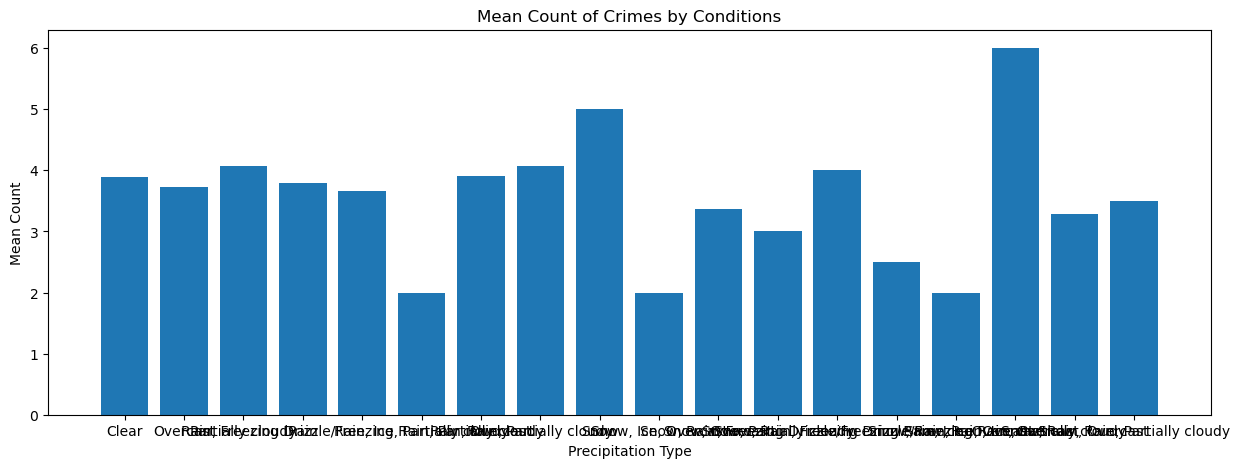

In [89]:
means = merged3.groupby(merged3['conditions'])['count'].mean()

# Plot the bar graph
plt.figure(figsize=(15, 5))
plt.bar(means.index, means.values)

# Labeling the axes and title
plt.xlabel('Precipitation Type')
plt.ylabel('Mean Count')
plt.title('Mean Count of Crimes by Conditions')
plt.show()

In [ ]:
merged3.groupby(merged3['preciptype'])['count'].mean()

preciptype
freezingrain                  4.000000
nan                           4.056987
rain                          4.021689
rain,freezingrain             3.600000
rain,freezingrain,snow        2.500000
rain,freezingrain,snow,ice    4.000000
rain,ice                      2.000000
rain,snow                     3.379653
rain,snow,ice                 3.333333
snow                          3.132530
snow,ice                      2.000000
Name: count, dtype: float64

In [68]:
merged3.groupby(merged3['conditions'])['count'].mean()

conditions
Clear                                                        3.883803
Overcast                                                     3.725191
Partially cloudy                                             4.064622
Rain                                                         3.800000
Rain, Freezing Drizzle/Freezing Rain, Partially cloudy       3.666667
Rain, Ice, Partially cloudy                                  2.000000
Rain, Overcast                                               3.903288
Rain, Partially cloudy                                       4.073322
Snow                                                         5.000000
Snow, Ice, Overcast                                          2.000000
Snow, Overcast                                               3.373134
Snow, Partially cloudy                                       3.000000
Snow, Rain, Freezing Drizzle/Freezing Rain, Ice, Overcast    4.000000
Snow, Rain, Freezing Drizzle/Freezing Rain, Overcast         2.500000
Snow, Rai

In [ ]:
merged3.groupby(merged3['Holiday'])['count'].mean()

Holiday
Christmas Day                 2.428571
Christmas Eve                 4.357143
Columbus Day                  4.857143
Halloween                     3.571429
Independence Day              3.857143
Labor Day                     2.928571
Martin Luther King Jr. Day    2.642857
Memorial Day                  3.285714
New Year's Day                8.785714
New Year's Eve                5.142857
Presidents' Day               3.214286
St. Patrick's Day             3.357143
Thanksgiving Day              3.285714
Valentine's Day               3.214286
Veterans Day                  3.785714
Name: count, dtype: float64

In [ ]:
merged3.groupby(merged3['day_of_week'])['count'].mean()

day_of_week
0    3.817321
1    3.847091
2    3.870095
3    3.783491
4    4.002706
5    4.188092
6    4.109608
Name: count, dtype: float64

In [ ]:
merged3.groupby(merged3['month'])['count'].mean()

month
1     3.498925
2     3.176887
3     3.255760
4     3.702381
5     3.940092
6     4.228571
7     4.380184
8     4.509217
9     4.178571
10    4.426267
11    4.069048
12    4.006912
Name: count, dtype: float64

In [ ]:
merged3['count'].mean()

3.9454861782331334

In [ ]:
merged3.groupby(merged3['conditions'])['count'].mean()

conditions
Clear                                                        3.883803
Overcast                                                     3.725191
Partially cloudy                                             4.064622
Rain                                                         3.800000
Rain, Freezing Drizzle/Freezing Rain, Partially cloudy       3.666667
Rain, Ice, Partially cloudy                                  2.000000
Rain, Overcast                                               3.903288
Rain, Partially cloudy                                       4.073322
Snow                                                         5.000000
Snow, Ice, Overcast                                          2.000000
Snow, Overcast                                               3.373134
Snow, Partially cloudy                                       3.000000
Snow, Rain, Freezing Drizzle/Freezing Rain, Ice, Overcast    4.000000
Snow, Rain, Freezing Drizzle/Freezing Rain, Overcast         2.500000
Snow, Rai

In [124]:
clear_df = merged3[merged3['conditions'].str.contains('Clear')]
clear_df['count'].mean()
rain_df = merged3[merged3['conditions'].str.contains('Rain')]
rain_df['count'].mean()
snow_df = merged3[merged3['conditions'].str.contains('Snow')]
snow_df['count'].mean()
over_df = merged3[merged3['conditions'].str.contains('Overcast')]
over_df['count'].mean()
ice_df = merged3[merged3['conditions'].str.contains('Ice')]
ice_df['count'].mean()
ice_df = merged3[merged3['conditions'].str.contains('Freezing')]
ice_df['count'].mean()
cloud_df = merged3[merged3['conditions'].str.contains('Partially')]
cloud_df['count'].mean()

3.8838028169014085

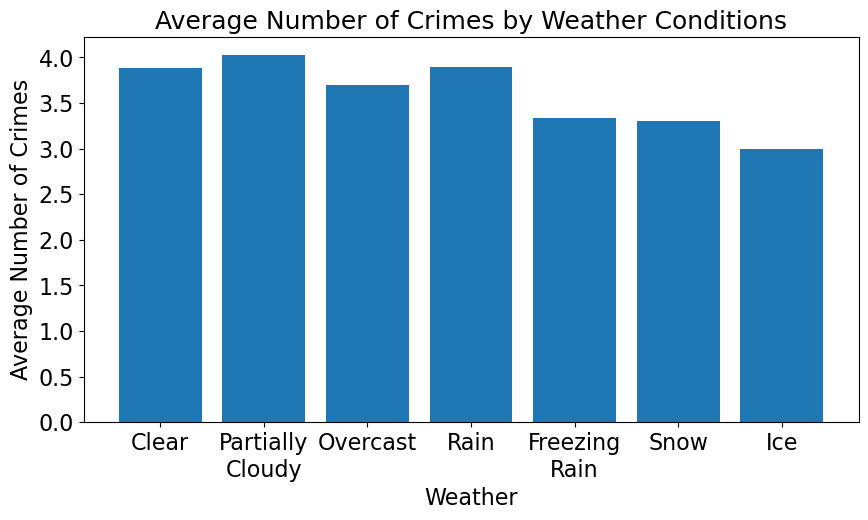

In [191]:
conditions = {"Clear": 3.8838028169014085, "Partially\nCloudy": 4.020718594282717, "Overcast": 3.6922357343311507,
           "Rain": 3.899159663865546, "Freezing\nRain": 3.3333333333333335, "Snow": 3.3053435114503817, "Ice": 3.0}

keys = list(conditions.keys())
values = list(conditions.values())

plt.figure(figsize=(10, 5))
# Creating bar graph
plt.bar(keys, values)

plt.xticks(fontsize=16)  
plt.yticks(fontsize=16)

# Adding labels and title
plt.xlabel('Weather', fontsize=16)
plt.ylabel('Average Number of Crimes', fontsize=16)
plt.title('Average Number of Crimes by Weather Conditions', fontsize=18)

# Displaying the plot
plt.show()

In [46]:
merged3['month_name'] = merged3['date'].apply(lambda x: x.strftime('%B'))

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
merged3['month_name'] = pd.Categorical(merged3['month_name'], categories=month_order, ordered=True)

In [185]:
months = pd.DataFrame(means)

In [187]:
means.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                  'Jul', 'Aug', 'Sept', 'Oct', 'Nov',
                  'Dec']

CategoricalIndex(['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November',
                  'December'],
                 categories=['January', 'February', 'March', 'April', ..., 'September', 'October', 'November', 'December'], ordered=True, dtype='category', name='month_name')

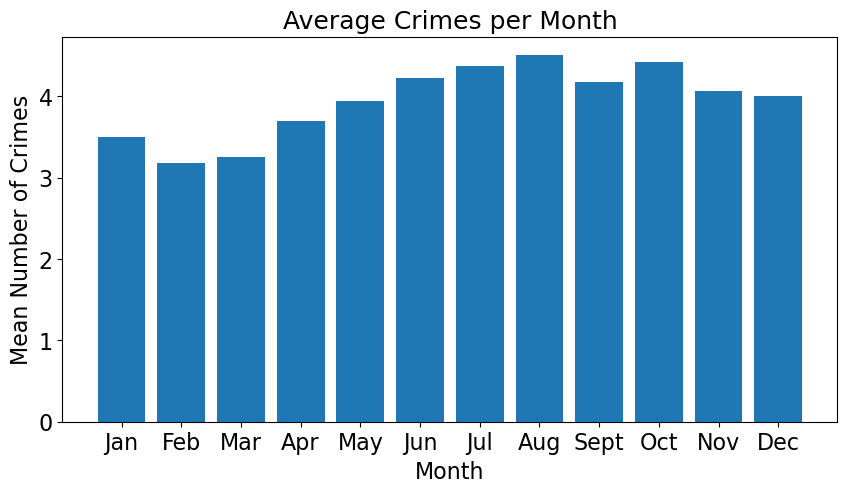

In [189]:
means = merged3.groupby(merged3['month_name'])['count'].mean()


# Plot the bar graph
means.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                  'Jul', 'Aug', 'Sept', 'Oct', 'Nov',
                  'Dec']
plt.figure(figsize=(10, 5))
plt.bar(means.index, means.values)

plt.xticks(fontsize=16)  
plt.yticks(fontsize=16)

# Labeling the axes and title
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Mean Number of Crimes', fontsize = 16)
plt.title('Average Crimes per Month', fontsize = 18)
plt.show()

In [ ]:
date_range = pd.date_range(start=merged3['date'].min(), end=merged3['date'].max())

# Identify missing dates by checking for differences between the date range and the dates in the DataFrame
missing_dates = date_range[~date_range.isin(merged3['date'])]

if len(missing_dates) > 0:
    print("Missing dates found:")
    print(missing_dates)
else:
    print("No missing dates found.")

No missing dates found.


# Final Random Forest

In [ ]:
merged3['preciptype'] = merged3['preciptype'].astype(object)


In [ ]:
X[cat_features].dtypes

preciptype    object
conditions    object
Holiday       object
dtype: object

In [ ]:
num_features

Index(['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'humidity', 'precip', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'moonphase', 'day_of_week', 'year', 'month',
       'CHIC917URN', 'snowdepth', 'precipcover', 'uvindex'],
      dtype='object')

In [111]:
X = merged3[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'humidity',
             'precip', 'windgust', 'windspeed', 'winddir', 
             'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 
             'moonphase', 'day_of_week', 'month', 'preciptype', 'conditions', 
             'Holiday', 'CHIC917URN', 'snowdepth', 'precipcover', 'uvindex']]

cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

y = list(merged3['count'])

numeric = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=2)),
    ('standardize', StandardScaler()),
    ('percent', SelectPercentile(f_regression, percentile=70))])

categorical = Pipeline(steps=[('impute2', SimpleImputer(strategy='most_frequent')),
                     ('one_hot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
                     ])

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric, num_features),
        ("categorical", categorical, cat_features)
        ]
)
rfPipe = Pipeline([('preprocessor', preprocessor),
           ('model', RandomForestRegressor())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rfPipe = rfPipe.fit(X_train, y_train)

y_pred = rfPipe.predict(X_test)  
mae = mean_absolute_error(y_test, y_pred) 
mae

1.7256723338485316

## XGBoost

In [176]:
cat_features = X.select_dtypes(include="object").columns

num_features = merged3[['feelslike',
                        'windspeed',
                        'sealevelpressure', 'solarradiation', 'solarenergy', 'uvindex',  
                        'moonphase', 'year', 'month', 'CHIC917URN']]

num_features = X.select_dtypes(exclude="object").columns

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer()),
           ('poly', PolynomialFeatures(degree=1, include_bias=False)),
           ("scaler", StandardScaler())])

categorical_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore")),
           ("selector", SelectPercentile(f_regression, percentile=50))])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features)])

pipe = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("model", XGBRegressor())])
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



xgb_pipe = pipe.fit(X_train, y_train)

y_pred = xgb_pipe.predict(X_test)  
mae = mean_absolute_error(y_test, y_pred) 
mae

1.7941810740940813

In [177]:
# Fit the pipeline to the training data
xgb_pipe.fit(X_train, y_train)

# Get feature importances from the XGBoost model
feature_importances = xgb_pipe.named_steps['model'].feature_importances_

# Get original feature names after preprocessing
numeric_feature_names = xgb_pipe.named_steps['preprocessor'].transformers_[0][2]
categorical_feature_names = xgb_pipe.named_steps['preprocessor'].transformers_[1][1] \
                            .named_steps['encoder'].get_feature_names_out(cat_features)

# Concatenate the feature names for numeric and categorical features
all_feature_names = list(numeric_feature_names) + list(categorical_feature_names)

# Combine feature names with their importances
feature_importance_mapping = dict(zip(all_feature_names, feature_importances))

# Sort feature importances in descending order
sorted_feature_importance_mapping = sorted(feature_importance_mapping.items(), key=lambda x: x[1], reverse=True)

# Display sorted feature importances
for feature, importance in sorted_feature_importance_mapping:
    print(f"{feature}: {importance}")


month: 0.06428922712802887
preciptype_rain,snow,ice: 0.05213025584816933
preciptype_rain,ice: 0.05187935754656792
conditions_Snow, Overcast: 0.04042520001530647
preciptype_rain,snow: 0.03682389482855797
solarenergy: 0.03441720828413963
preciptype_freezingrain: 0.031934186816215515
conditions_Rain, Freezing Drizzle/Freezing Rain, Partially cloudy: 0.030426153913140297
temp: 0.030252350494265556
moonphase: 0.02983604371547699
CHIC917URN: 0.028898881748318672
conditions_Rain: 0.028492843732237816
cloudcover: 0.02746141143143177
solarradiation: 0.026796195656061172
day_of_week: 0.025158211588859558
feelslike: 0.024917829781770706
visibility: 0.024844039231538773
feelslikemin: 0.024791041389107704
tempmin: 0.02471041865646839
precip: 0.024363474920392036
windspeed: 0.024333974346518517
sealevelpressure: 0.02422473393380642
precipcover: 0.02406725287437439
uvindex: 0.023500729352235794
snowdepth: 0.02242441661655903
windgust: 0.022206788882613182
feelslikemax: 0.021651191636919975
winddir: 0

In [23]:
from sklearn.ensemble import StackingRegressor, VotingRegressor
from xgboost import XGBRegressor

In [28]:
vr = VotingRegressor([('random_forest', rfPipe), ('XGB', xgb_pipe)])
pred = vr.fit(X_train, y_train)

In [35]:
pred = pred.predict(X_test)
mean_absolute_error(y_test, pred)

1.711216348024382

In [173]:
num_features = merged3[['feelslike',
                        'windspeed',
                        'sealevelpressure', 'solarradiation', 'solarenergy', 'uvindex',  
                        'moonphase', 'year', 'month', 'CHIC917URN']]

y = list(merged3['count'])


numeric= Pipeline(
    steps=[("imputer", SimpleImputer()),
           ("scaler", StandardScaler()),
           ("model", XGBRegressor())])


X_train, X_test, y_train, y_test = train_test_split(num_features, y, test_size=0.2, random_state=42)


xgb_pipe = numeric.fit(X_train, y_train)

y_pred = xgb_pipe.predict(X_test)  
mae = mean_absolute_error(y_test, y_pred) 
mae

1.7699433276618737

In [174]:
rf_model = xgb_pipe.named_steps['model']

feature_importances = rf_model.feature_importances_

original_numeric_feature_names = num_features.columns

feature_importance_df = pd.DataFrame({'Feature': original_numeric_feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

            Feature  Importance
8             month    0.178378
7              year    0.122996
4       solarenergy    0.097872
9        CHIC917URN    0.095256
3    solarradiation    0.090857
5           uvindex    0.089058
6         moonphase    0.087575
1         windspeed    0.085092
2  sealevelpressure    0.081509
0         feelslike    0.071408


In [160]:
xgb_features = {"Month": 0.080046, "Year": 0.061705, "Min Feels\nLike": 0.043496, "UV Index": 0.043371, "Solar Energy": 0.043148}

random_features = {"Sea Level\nPressure": 0.070090, "Wind Speed": 0.068993, "Wind Dir": 0.068234, "Cloud Cover": 0.065375, "Moonphase": 0.064872}

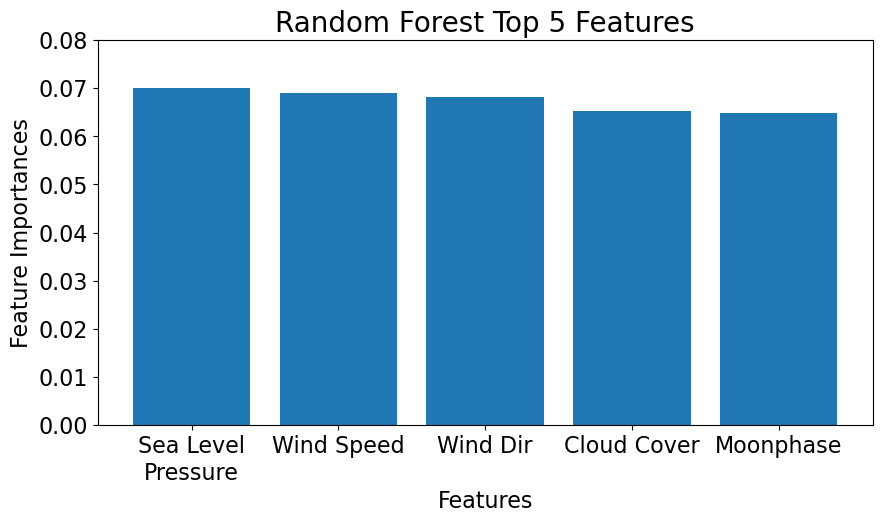

In [158]:
keys = list(random_features.keys())
values = list(random_features.values())

plt.figure(figsize=(10, 5))
plt.ylim(0, .08) 
plt.bar(keys, values)

plt.xticks(fontsize=16)  
plt.yticks(fontsize=16)

plt.xlabel('Features', fontsize=16)
plt.ylabel('Feature Importances', fontsize=16)
plt.title('Random Forest Top 5 Features', fontsize=20)

plt.show()

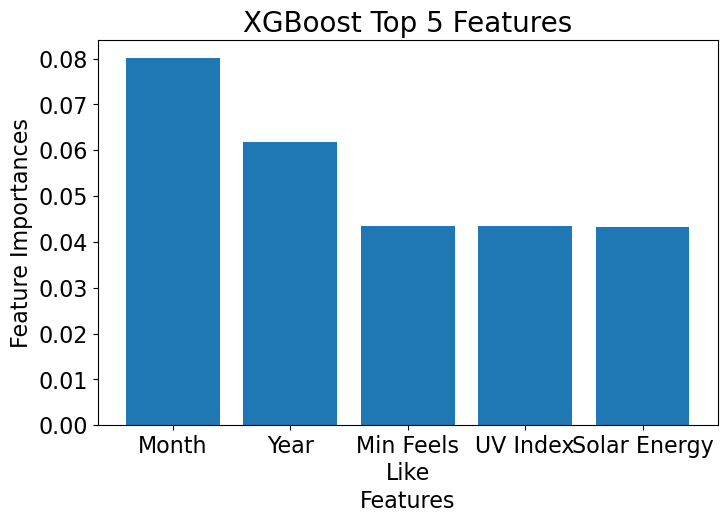

In [161]:
keys = list(xgb_features.keys())
values = list(xgb_features.values())

plt.figure(figsize=(8, 5))
plt.bar(keys, values)

plt.xticks(fontsize=16)  # Set font size for x-axis labels
plt.yticks(fontsize=16)  # Set font size for y-axis labels
plt.xlabel('Features', fontsize=16)  # Set font size for x-axis label
plt.ylabel('Feature Importances', fontsize=16)     # Set font size for y-axis label
plt.title('XGBoost Top 5 Features', fontsize=20)

plt.show()

In [71]:
import numpy as np

In [ ]:
merged3.to_csv('merged3.csv', index= False)

## Correlations

In [36]:
merged3.corr(numeric_only=True)

,count,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,CHIC917URN,day_of_week,year,month
count,1.000000,0.163055,0.173351,0.172223,0.163961,0.177434,0.174973,0.162983,-0.036048,-0.032907,...,0.074075,0.059261,0.059021,0.064091,-0.009180,-0.005048,-0.011073,0.054104,-0.028098,0.141455
tempmax,0.163055,1.000000,0.954462,0.988523,0.994268,0.957331,0.986500,0.931599,-0.197230,0.113111,...,0.288370,0.515624,0.515099,0.528137,0.397897,-0.001143,0.025910,-0.010177,0.004491,0.255953
tempmin,0.173351,0.954462,1.000000,0.985225,0.952275,0.994987,0.981594,0.968476,-0.062692,0.154393,...,0.218449,0.437959,0.437468,0.432956,0.402602,-0.000230,0.016946,-0.017026,0.008474,0.284244
temp,0.172223,0.988523,0.985225,1.000000,0.984090,0.985091,0.997127,0.959727,-0.140878,0.130469,...,0.258758,0.487854,0.487358,0.490419,0.406258,-0.001682,0.022625,-0.012830,0.004662,0.274052
feelslikemax,0.163961,0.994268,0.952275,0.984090,1.000000,0.956907,0.987523,0.934833,-0.171221,0.125176,...,0.273756,0.499617,0.499082,0.511494,0.415938,-0.000764,0.024666,-0.009052,0.001633,0.261837
feelslikemin,0.177434,0.957331,0.994987,0.985091,0.956907,1.000000,0.986644,0.964106,-0.075964,0.143473,...,0.230109,0.448814,0.448351,0.445275,0.380565,0.001237,0.018302,-0.016403,0.005050,0.292305
feelslike,0.174973,0.986500,0.981594,0.997127,0.987523,0.986644,1.000000,0.958248,-0.135288,0.130543,...,0.256884,0.484510,0.484020,0.487722,0.402370,-0.001190,0.022717,-0.012406,0.001749,0.281581
dew,0.162983,0.931599,0.968476,0.959727,0.934833,0.964106,0.958248,1.000000,0.138834,0.236640,...,0.094266,0.355090,0.354599,0.339832,0.427448,0.004222,0.015092,-0.014670,-0.006836,0.286569
humidity,-0.036048,-0.197230,-0.062692,-0.140878,-0.171221,-0.075964,-0.135288,0.138834,1.000000,0.396396,...,-0.659362,-0.468398,-0.468376,-0.536491,0.019078,0.023472,-0.022227,-0.005139,-0.040862,0.025299
precip,-0.032907,0.113111,0.154393,0.130469,0.125176,0.143473,0.130543,0.236640,0.396396,1.000000,...,-0.331350,-0.156356,-0.156772,-0.183407,0.129457,0.030476,-0.010274,-0.000102,0.004308,0.015048


In [197]:
domestic_violence_yes = crimes2[crimes2['Domestic'] == True]
domestic_violence_no = crimes2[crimes2['Domestic'] == False]

# Then perform the value count operation on each filtered dataframe
crime_count_yes = pd.DataFrame(domestic_violence_yes['date'].value_counts().reset_index())
crime_count_no = pd.DataFrame(domestic_violence_no['date'].value_counts().reset_index())

crime_count = pd.merge(crime_count_yes, crime_count_no, on='date', how='outer').fillna(0)

print(crime_count)

merged3 = pd.merge(crime_count, weather, on='date', how='outer')
merged3 = pd.merge(merged3, full_moon, on='date', how = 'left')
merged3 = pd.merge(merged3, holidays, on='date', how = 'left')
merged3 = pd.merge(merged3, unemploy, on='date', how = 'left')

merged3 = merged3[merged3['date'].dt.year > 2009]
merged3 = merged3.sort_values(by = 'date')

merged3['CHIC917URN'] = merged3['CHIC917URN'].fillna(method='ffill')

merged3['day_of_week'] = pd.to_datetime(merged3['date']).dt.day_of_week
merged3['year'] = pd.to_datetime(merged3['date']).dt.year
merged3['month'] = pd.to_datetime(merged3['date']).dt.month

merged3['count_x'] = merged3['count_x'].fillna(0)
merged3['count_y'] = merged3['count_y'].fillna(0)

merged3.corr(numeric_only=True)

           date  count_x  count_y
0    2014-01-01      8.0      7.0
1    2001-01-01      8.0     11.0
2    2010-01-01      8.0      5.0
3    2015-01-01      6.0      7.0
4    2012-01-01      6.0      6.0
...         ...      ...      ...
8266 2020-01-11      0.0      1.0
8267 2011-02-14      0.0      1.0
8268 2004-11-24      0.0      1.0
8269 2010-09-12      0.0      1.0
8270 2023-07-28      0.0      1.0

[8271 rows x 3 columns]


,count_x,count_y,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,CHIC917URN,day_of_week,year,month
count_x,1.000000,0.025993,0.070687,0.066575,0.070426,0.065136,0.063188,0.066668,0.062510,-0.024974,...,0.029144,0.007884,0.007596,0.015579,0.033557,0.003491,-0.025815,0.027683,0.059390,0.003765
count_y,0.025993,1.000000,0.148957,0.161735,0.158998,0.152121,0.167492,0.163456,0.152093,-0.029256,...,0.068838,0.061139,0.060992,0.063348,-0.022414,-0.006844,-0.001853,0.047763,-0.053811,0.151857
tempmax,0.070687,0.148957,1.000000,0.954462,0.988523,0.994268,0.957331,0.986500,0.931599,-0.197230,...,0.288370,0.515624,0.515099,0.528137,0.397897,-0.001143,0.025910,-0.010177,0.004491,0.255953
tempmin,0.066575,0.161735,0.954462,1.000000,0.985225,0.952275,0.994987,0.981594,0.968476,-0.062692,...,0.218449,0.437959,0.437468,0.432956,0.402602,-0.000230,0.016946,-0.017026,0.008474,0.284244
temp,0.070426,0.158998,0.988523,0.985225,1.000000,0.984090,0.985091,0.997127,0.959727,-0.140878,...,0.258758,0.487854,0.487358,0.490419,0.406258,-0.001682,0.022625,-0.012830,0.004662,0.274052
feelslikemax,0.065136,0.152121,0.994268,0.952275,0.984090,1.000000,0.956907,0.987523,0.934833,-0.171221,...,0.273756,0.499617,0.499082,0.511494,0.415938,-0.000764,0.024666,-0.009052,0.001633,0.261837
feelslikemin,0.063188,0.167492,0.957331,0.994987,0.985091,0.956907,1.000000,0.986644,0.964106,-0.075964,...,0.230109,0.448814,0.448351,0.445275,0.380565,0.001237,0.018302,-0.016403,0.005050,0.292305
feelslike,0.066668,0.163456,0.986500,0.981594,0.997127,0.987523,0.986644,1.000000,0.958248,-0.135288,...,0.256884,0.484510,0.484020,0.487722,0.402370,-0.001190,0.022717,-0.012406,0.001749,0.281581
dew,0.062510,0.152093,0.931599,0.968476,0.959727,0.934833,0.964106,0.958248,1.000000,0.138834,...,0.094266,0.355090,0.354599,0.339832,0.427448,0.004222,0.015092,-0.014670,-0.006836,0.286569
humidity,-0.024974,-0.029256,-0.197230,-0.062692,-0.140878,-0.171221,-0.075964,-0.135288,0.138834,1.000000,...,-0.659362,-0.468398,-0.468376,-0.536491,0.019078,0.023472,-0.022227,-0.005139,-0.040862,0.025299
